In [1]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
from astropy.time import Time
from astropy.visualization import time_support, astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()
time_support()  

<astropy.visualization.time.time_support.<locals>.MplTimeConverter at 0x7faa830e8f10>

In [2]:
start_time='2020-02-07T20_00'
star='pollux'

In [3]:
data= np.load(f'plots/FoV_preliminary_north_20min_{start_time}.npy', 
              allow_pickle=True, encoding='latin1', fix_imports=True).flat[0]

In [4]:
stars = list(data.keys())
#sites = list(data[events[0]].keys())

for i, name in enumerate(stars):
    print(i,name)


0 mirfak
1 errai
2 sirius
3 alpha cmi
4 pollux
5 epsilon umi
6 kochab
7 elnath
8 betelgeuse
9 capella
10 bellatrix
11 rigel
12 aldebaran
13 menkar
14 regulus
15 alpha cas
16 mirach
17 hamal
18 gamma eri
19 alpha and
20 beta per
21 electra
22 omicron uma
23 epsilon leo
24 sao 6487
25 sao 168460
26 polaris
27 sao 136871
28 dubhe
29 merak
30 52 uma
31 54 uma
32 rho pup
33 delta umi
34 alpha cet
35 35 hya
36 gamma uma
37 alula borealis
38 30 boo
39 theta leo
40 gamma boo
41 mizar
42 alpha com
43 70 vir
44 79 vir
45 vega
46 alpha oph
47 marfik
48 eta oph
49 antares
50 delta her
51 gamma dra
52 eta dra
53 alpha dra
54 alpha crb
55 alpha ser
56 delta scorpio
57 deneb
58 17 aql


In [5]:
#len(data['errai'].keys())

In [6]:
divergence=[0.0022,0.0043,0.008,0.01135,0.01453]


In [7]:
for name in stars:
    print(name)
    if len(data[name].keys())>1:
        for div in divergence:
            for i in range(len(data[name][div]['obstime'])):
                data[name][div]['obstime']=Time(data[name][div]['obstime'], scale='utc', format ='isot')

mirfak
errai
sirius
alpha cmi
pollux
epsilon umi
kochab
elnath
betelgeuse
capella
bellatrix
rigel
aldebaran
menkar
regulus
alpha cas
mirach
hamal
gamma eri
alpha and
beta per
electra
omicron uma
epsilon leo
sao 6487
sao 168460
polaris
sao 136871
dubhe
merak
52 uma
54 uma
rho pup
delta umi
alpha cet
35 hya
gamma uma
alula borealis
30 boo
theta leo
gamma boo
mizar
alpha com
70 vir
79 vir
vega
alpha oph
marfik
eta oph
antares
delta her
gamma dra
eta dra
alpha dra
alpha crb
alpha ser
delta scorpio
deneb
17 aql


In [8]:
for name in stars:
    
        if name==star:
            if len(data[name].keys())>1:
                for i in range(len(data[name][divergence[0]]['hFoV_track'])):
                    print(data[name][divergence[0]]['obstime'][i])
                    print(data[name][divergence[0]]['alt'][i])
            else:
                print('the selected star is not visible from the site')
                print('\nPlease select another source')

2020-02-07T20:00:00.000
40.24538944804207
2020-02-07T20:20:00.000
44.5291819795713
2020-02-07T20:40:00.000
48.83726813498287
2020-02-07T21:00:00.000
53.166421277892795
2020-02-07T21:20:00.000
57.513668909217394
2020-02-07T21:40:00.000
61.87622958500305
2020-02-07T22:00:00.000
66.2514341854206
2020-02-07T22:20:00.000
70.63659709145468
2020-02-07T22:40:00.000
75.02872422774978
2020-02-07T23:00:00.000
79.42357187243915
2020-02-07T23:20:00.000
83.81081741222177
2020-02-07T23:40:00.000
88.10175290174938
2020-02-08T00:00:00.000
87.2047922614239
2020-02-08T00:20:00.000
82.86359807666531
2020-02-08T00:40:00.000
78.47292194890984
2020-02-08T01:00:00.000
74.07815207638446
2020-02-08T01:20:00.000
69.68723744539193
2020-02-08T01:40:00.000
65.30398840933798
2020-02-08T02:00:00.000
60.93128962603823
2020-02-08T02:20:00.000
56.57180716620319
2020-02-08T02:40:00.000
52.228226190769576
2020-02-08T03:00:00.000
47.90336371927577
2020-02-08T03:20:00.000
43.60024218700727
2020-02-08T03:40:00.000
39.3221512

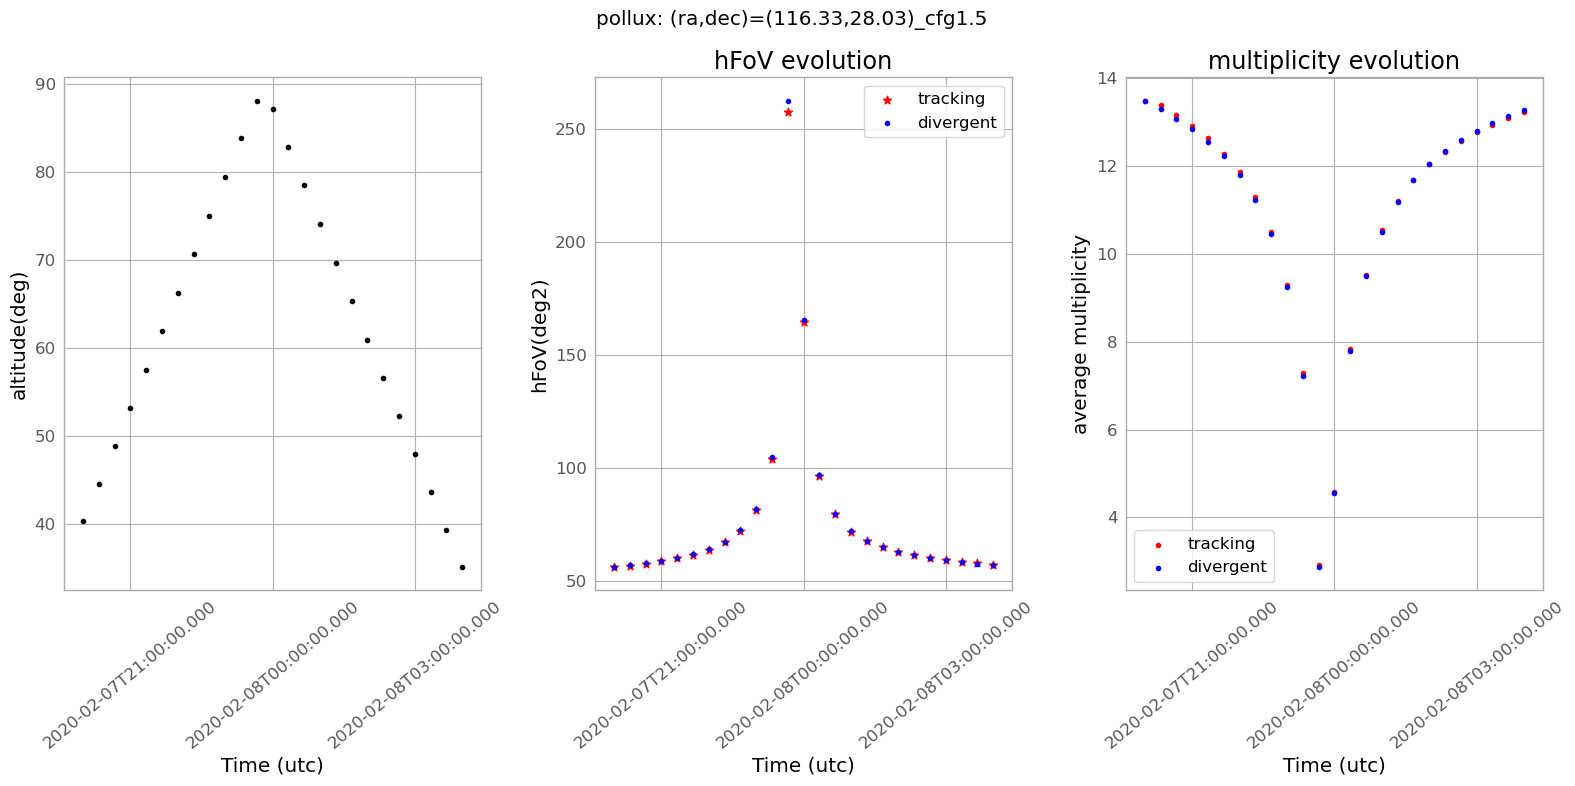

In [11]:
for name in stars:
    
    if name==star:
        div = divergence[0]
        fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=3)
        fig.suptitle(f"{name}: (ra,dec)=({round(data[name]['ra_dec'][0],2)},{round(data[name]['ra_dec'][1],2)})_div={div}")

        for i in range(len(data[name][divergence[0]]['hFoV_track'])):
            
            #time=Time(data[name][div]['obstime'][i],scale='utc',format='isot')
            
            #if data[name][divergence[0]]['obstime'][i]>=Time('2020-02-08T00:00',scale='utc', format='isot'):
                #print(data[name][divergence[0]]['obstime'][i])
                ax[0].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['alt'][i],marker='.',color='black')
                ax[0].set_ylabel('altitude(deg)')
                ax[0].xaxis.set_tick_params(rotation=40)
                
                
                ax[1].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['hFoV_track'][i],marker='*',color='r',label='traking_hFoV')
                ax[1].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['hFoV_div'][i],marker='.',color='blue',label='div_hFoV')
                ax[1].set_title('hFoV evolution')
                ax[1].set_ylabel('hFoV(deg2)')
                ax[1].xaxis.set_tick_params(rotation=40)
                ax[1].legend(['tracking','divergent'])
                
                ax[2].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['m_ave_track'][i],marker='.',color='r',label='traking_hFoV')
                ax[2].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['m_ave_div'][i],marker='.',color='blue',label='div_hFoV')
                ax[2].set_title('multiplicity evolution')
                ax[2].set_ylabel('average multiplicity')
                ax[2].xaxis.set_tick_params(rotation=40)
                ax[2].legend(['tracking','divergent'])
        #ax[2].set_xticks(data[name][divergence[0]]['obstime'])
        #ax[2].set_xticklabels(data[name][divergence[0]]['obstime'], rotation = 45)
        fig.tight_layout()

        
plt.show();

In [12]:
data[star][div]['alt'][1]

44.5291819795713

In [13]:
div=divergence[0]

/home/irene/miniconda3/envs/divergent/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


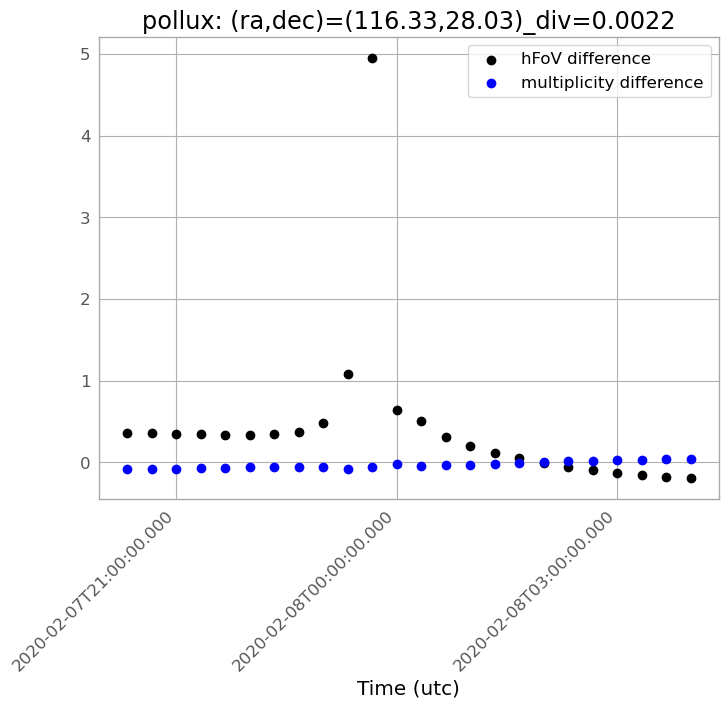

In [14]:
#star='pollux'
for i in range(1,len(data[star][div]['hFoV_track'])):            
    #if data[star][divergence[0]]['obstime'][i]>=Time('2020-02-08T04:00',scale='utc', format='isot'):
    plt.scatter(data[star][div]['obstime'][i],data[star][div]['hfov_diff'][i],color='black')
    plt.scatter(data[star][div]['obstime'][i], data[star][div]['m_ave_diff'][i],color='blue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{star}: (ra,dec)=({round(data[star]['ra_dec'][0],2)},{round(data[star]['ra_dec'][1],2)})_div={div}")
    plt.legend(['hFoV difference','multiplicity difference'])

In [15]:
for div in divergence:
    data[star][div]['hfov_diff']=np.asarray(data[star][div]['hfov_diff'])
data[star][divergence[0]]['hfov_diff']

array([ 0.        ,  0.35949877,  0.35549967,  0.35002351,  0.34159651,
        0.33595955,  0.33445865,  0.34136738,  0.37059252,  0.47663319,
        1.08120144,  4.94839428,  0.63691073,  0.51102701,  0.3121947 ,
        0.20190405,  0.11897248,  0.05141465, -0.00667735, -0.05643108,
       -0.09735008, -0.13156287, -0.15749624, -0.17836679, -0.19153159])

In [16]:
for div in divergence:
    data[star][div]['m_ave_diff']=np.asarray(data[star][div]['m_ave_diff'])
np.max(np.abs(data[star][div]['hfov_diff']))

25.104195257164065

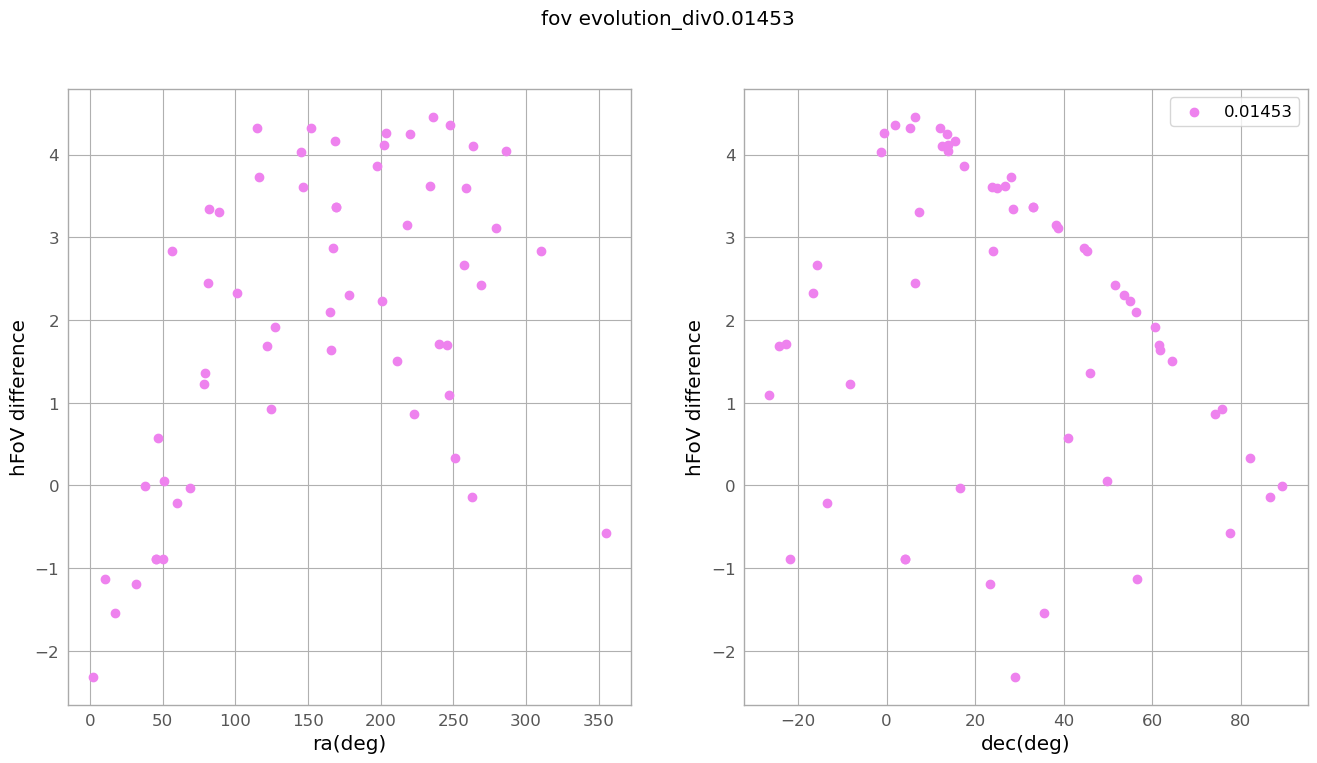

In [17]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[4]}")

for name in stars:
    #for j,div in enumerate(divergence):
    if len(data[name].keys())>1:
        div=divergence[4]
        if name != 'sao 136871':
            try:
                ax[0].scatter(data[name]['ra_dec'][0],data[name][div]['hfov_diff'][1],color=color[4])
                ax[1].scatter(data[name]['ra_dec'][1],data[name][div]['hfov_diff'][1],color=color[4])
            except ValueError:  #raised if `y` is empty.
                pass

            ax[0].set_ylabel('hFoV difference')
            ax[0].set_xlabel('ra(deg)')
            #ax[0].set_ylim(-1,25)

            ax[1].set_ylabel('hFoV difference')
            ax[1].set_xlabel('dec(deg)')
            #ax[1].set_ylim(-1,25)

            plt.legend([div])

In [37]:
diff=[]
div=divergence[0]
for i,name in enumerate(stars):
    #if name != 'sao 136871':
        if len(data[name].keys())>1:
            diff.append(np.abs(data[name][div]['hfov_diff'][3]))
            #print(name,diff[i])

diff=np.asarray(diff)
diff

array([0.03064224, 0.05534473, 0.14170263, 0.40266314, 0.35002351,
       0.03241303, 0.08399264, 0.35503357, 0.18736756, 0.07832839,
       0.03387476, 0.01047347, 0.00105575, 0.16496405, 0.43559756,
       0.08677121, 0.12861852, 0.12885011, 0.11320711, 0.19271616,
       0.1248594 , 0.06536918, 0.17052004, 0.37940701, 0.08144127,
       0.18344799, 0.00336111, 0.27629498, 0.16386003, 0.20616833,
       0.28314101, 0.33609813, 0.0786399 , 0.01501999, 0.16496405,
       0.35773757, 0.22564847, 0.33609813, 0.43168672, 0.42645869,
       0.31306524, 0.21709784, 0.41218736, 0.43197369, 0.39579404,
       0.31044491, 0.43538231, 0.40688223, 0.18830377, 0.01763593,
       0.37377222, 0.23915792, 0.16825334, 0.1470834 , 0.36611483,
       0.43858354, 0.07844027, 0.27767167, 0.42967065])

In [38]:
np.max(diff)

0.43858353516756665

In [39]:
for i in range(len(diff)):
    if diff[i]==np.max(diff):
        print (i, stars[i])

55 alpha ser


In [40]:
import matplotlib.cm as cm
size=5e2*(diff)
               
color=cm.cool((diff)/np.max((diff)))
#size  = 100*np.log10(diff)
#color = cm.cool(np.log10(diff)/np.max(np.log10(diff)))
color[0]

array([0.06666667, 0.93333333, 1.        , 1.        ])

In [41]:
#from colorspacious import cspace_converter
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list


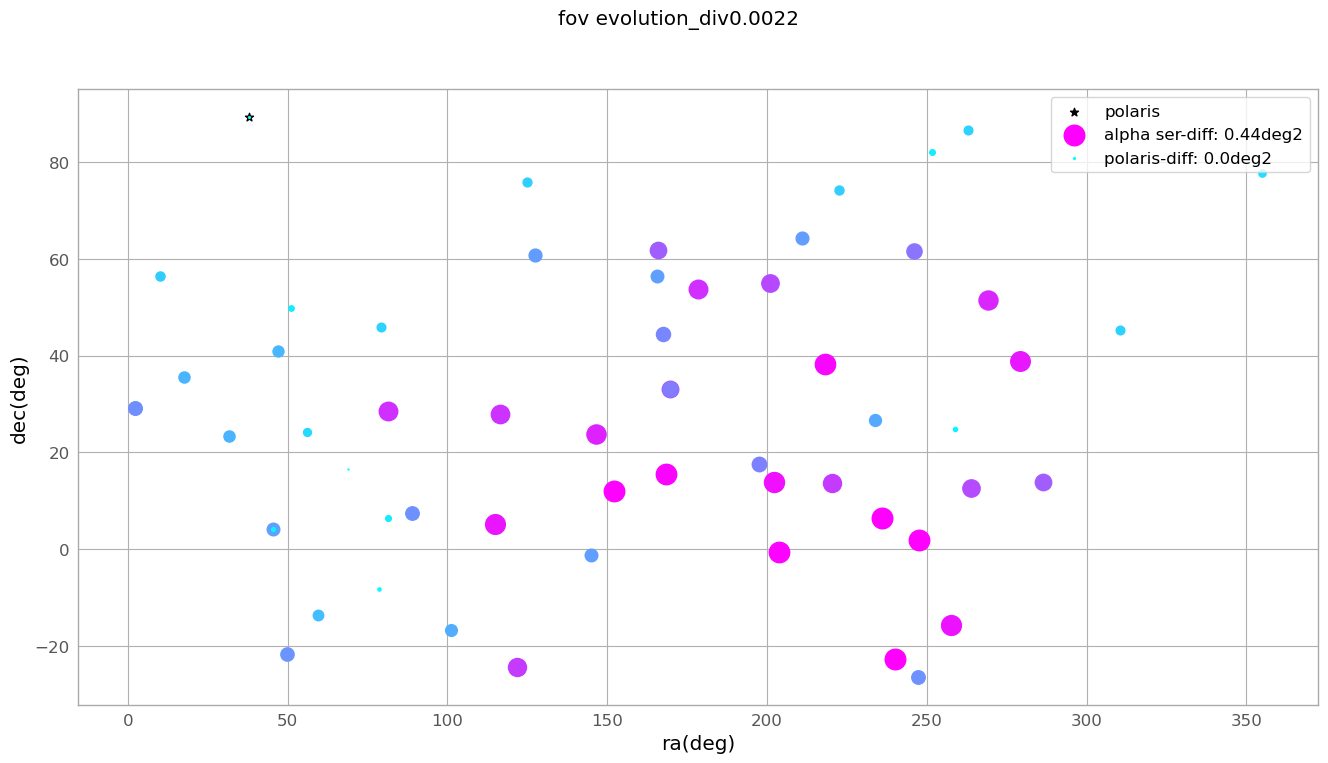

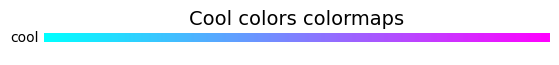

In [43]:
fig,ax=plt.subplots(figsize=(16,8))
fig.suptitle(f"fov evolution_div{div}")

for i,name in enumerate(stars):
    if len(data[name].keys())>1:
        if name != 'sao 136871':
            if i>=27:
                i=i-1

            ax.scatter(data[name]['ra_dec'][0],data[name]['ra_dec'][1],color=color[i],s=size[i])

            ax.set_ylabel('dec(deg)')
            ax.set_xlabel('ra(deg)')
    #plt.annotate(name,(data[name]['ra_dec'][0]+0.01,data[name]['ra_dec'][1]+0.01))
ax.scatter(data['polaris']['ra_dec'][0],data['polaris']['ra_dec'][1],marker='*', color='black',label='polaris')

ax.scatter(data[stars[55]]['ra_dec'][0],data[stars[55]]['ra_dec'][1],color=color[55],s=size[55],label=f'{stars[55]}-diff: {np.round(diff[55],2)}deg2')
ax.scatter(data[stars[26]]['ra_dec'][0],data[stars[26]]['ra_dec'][1],color=color[26],s=size[26],label=f'{stars[26]}-diff: {np.round(diff[26],2)}deg2')
plt.legend()
plot_color_gradients('Cool colors',['cool'])

No handles with labels found to put in legend.


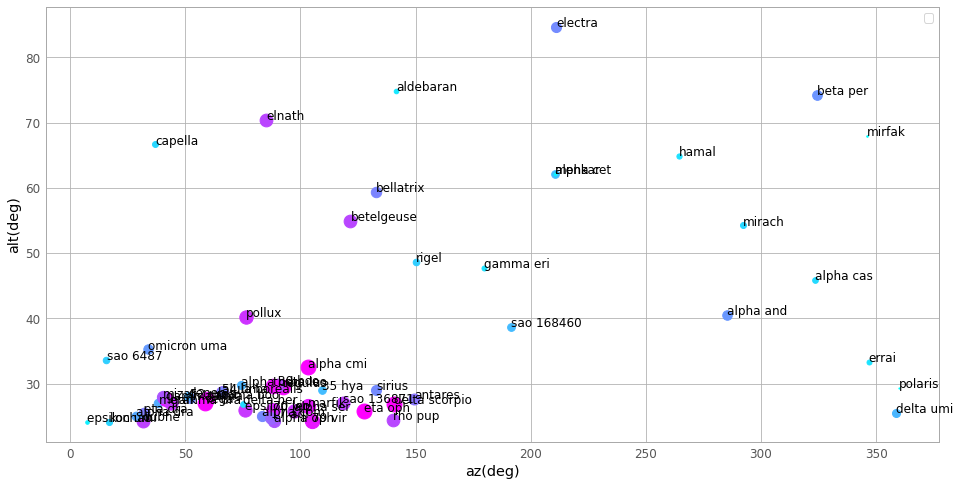

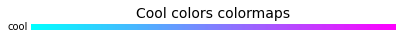

In [21]:
fig,ax=plt.subplots(figsize=(16,8))
#fig.suptitle(f"fov evolution_div{div}")

for i,name in enumerate(stars):
    if len(data[name].keys())>1:
        if name != 'sao 136871':
            if i>=27:
                i=i-1

        ax.scatter(data[name][div]['az'][0],data[name][div]['alt'][0],color=color[i],s=size[i])

        ax.set_ylabel('alt(deg)')
        ax.set_xlabel('az(deg)')
        plt.annotate(name,(data[name][div]['az'][0]+0.01,data[name][div]['alt'][0]+0.01))
        #ax.set_xlim(0,150)
        #ax.set_ylim(24,40)
#ax.scatter(data['marfik'][div]['az'][0],data['marfik'][div]['alt'][0], color=color[46],s=size[46],label='marfik:max diff')
#plt.annotate('marfik',(data['marfik'][div]['az'][1],data['marfik'][div]['alt'][1]))
ax.legend()
plot_color_gradients('Cool colors',['cool'])


In [22]:

for name in stars:
    #for j,div in enumerate(divergence):
    div=divergence[4]
    data[name][div]['fov_z20']=[]
    data[name][div]['fov_z40']=[]
    data[name][div]['fov_z60']=[]
    for i in range(len(data[name][div]['alt'])):
        if data[name][div]['alt'][i]>70:
             data[name][div]['fov_z20'].append(data[name][div]['hfov_diff'][i])
        elif data[name][div]['alt'][i]>50 and data[name][div]['alt'][i]<70:
            data[name][div]['fov_z40'].append(data[name][div]['hfov_diff'][i])
        elif data[name][div]['alt'][i]<50: 
            data[name][div]['fov_z60'].append(data[name][div]['hfov_diff'][i])
            

In [23]:
len(data[star][div]['fov_z40'])

9

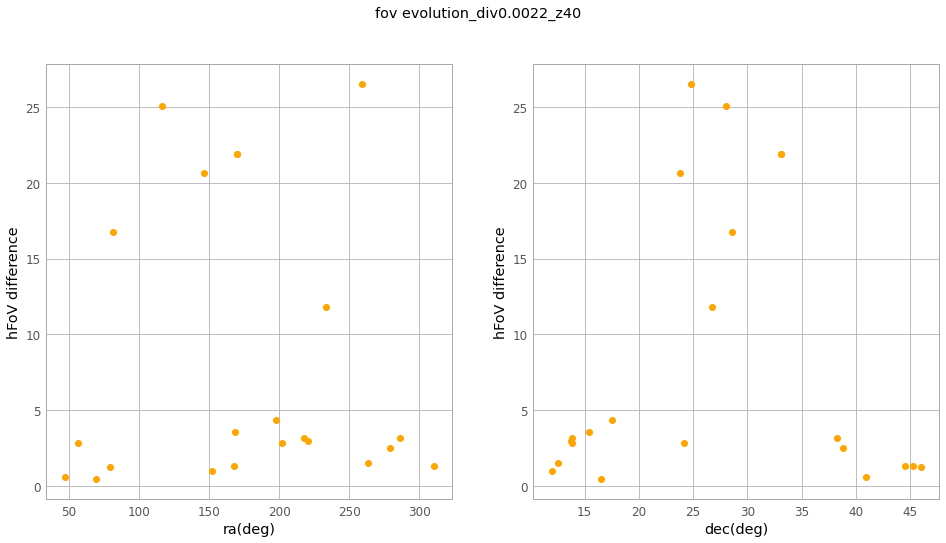

In [24]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[0]}_z40")

for name in stars:
    #for j,div in enumerate(divergence):
    div=divergence[4]
    if len(data[name][div]['fov_z20'])>0:
        ax[0].scatter(data[name]['ra_dec'][0],np.max(data[name][div]['fov_z20']),color=color[2])
        ax[1].scatter(data[name]['ra_dec'][1],np.max((data[name][div]['fov_z20'])),color=color[2])
    

    ax[0].set_ylabel('hFoV difference')
    ax[0].set_xlabel('ra(deg)')
    #ax[0].set_ylim(-0.05,3.5)

    ax[1].set_ylabel('hFoV difference')
    ax[1].set_xlabel('dec(deg)')
    #ax[1].set_ylim(-1,3.5)
    #ax[1].annotate(name, (data[name]['ra_dec'][1],np.max(np.abs(data[name][div]['hfov_diff']))))

    #plt.legend([div])

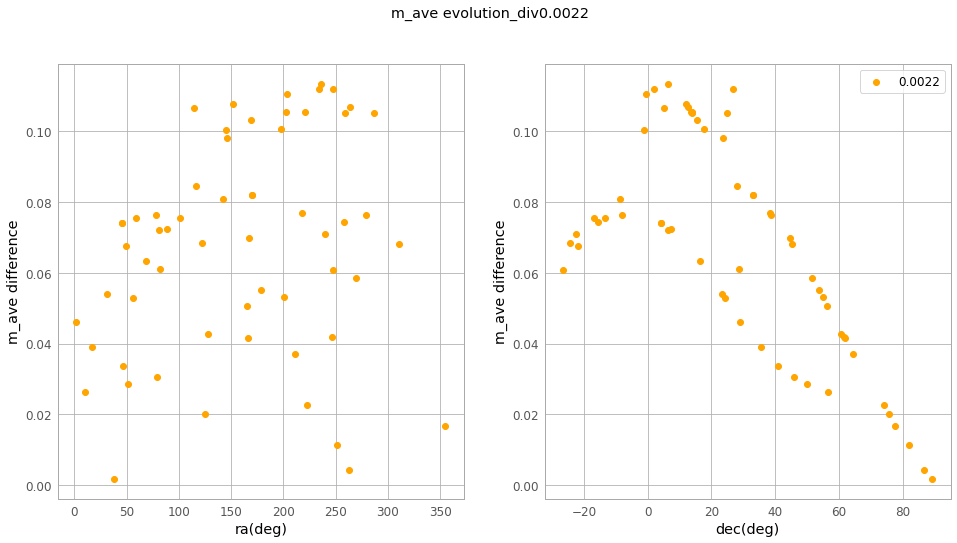

In [25]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"m_ave evolution_div{divergence[0]}")

for name in stars:
    #for j,div in enumerate(divergence):
    div=divergence[0]
    try:
        ax[0].scatter(data[name]['ra_dec'][0],np.max(np.abs(data[name][div]['m_ave_diff'])),color=color[2])
        ax[1].scatter(data[name]['ra_dec'][1],np.max(np.abs(data[name][div]['m_ave_diff'])),color=color[2])
    except ValueError:  #raised if `y` is empty.
        pass
    
    ax[0].set_ylabel('m_ave difference')
    ax[0].set_xlabel('ra(deg)')
    #ax[0].set_ylim(-1,25)
    
    ax[1].set_ylabel('m_ave difference')
    ax[1].set_xlabel('dec(deg)')
    #ax[1].set_ylim(-1,25)

    plt.legend([div])

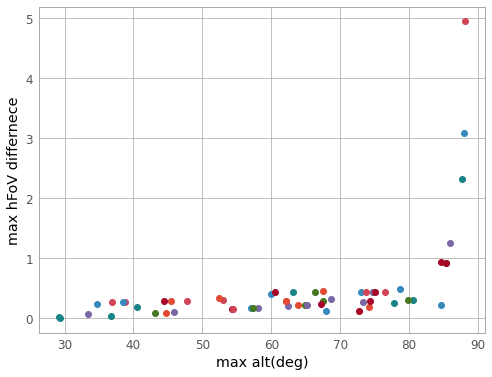

In [26]:
for name in stars:
    #for j,div in enumerate(divergence):
    div=divergence[0]
    try:
        plt.scatter(np.max(data[name][div]['alt']),np.max(np.abs(data[name][div]['hfov_diff'])))
        plt.xlabel('max alt(deg)')
        plt.ylabel('max hFoV differnece')
        
    except ValueError:  #raised if `y` is empty.
        pass
    

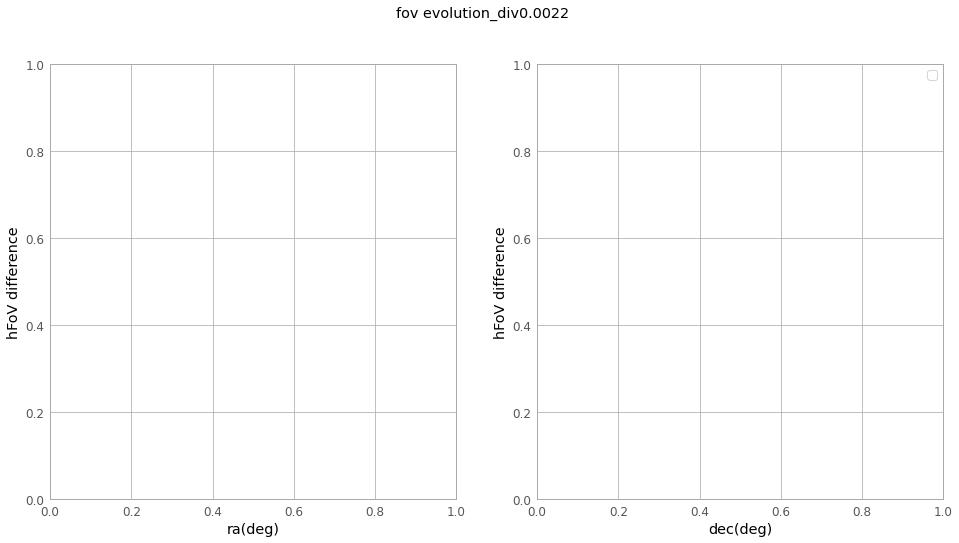

In [27]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[0]}")

for name in stars:
    div=divergence[0]
    for i in range(len(data[name][div]['obstime'])):
    #for j,div in enumerate(divergence):
   
        if data[name][div]['obstime'][i]==Time('2020-02-07T20:30',scale='utc', format='isot'):

            ax[0].scatter(data[name]['ra_dec'][0],data[name][div]['hfov_diff'][i],color=color[2])
            ax[1].scatter(data[name]['ra_dec'][1],data[name][div]['hfov_diff'][i],color=color[2])

    ax[0].set_ylabel('hFoV difference')
    ax[0].set_xlabel('ra(deg)')
    #ax[0].set_ylim(-1,25)
    
    ax[1].set_ylabel('hFoV difference')
    ax[1].set_xlabel('dec(deg)')
    #ax[1].set_ylim(-1,25)

    plt.legend([div])

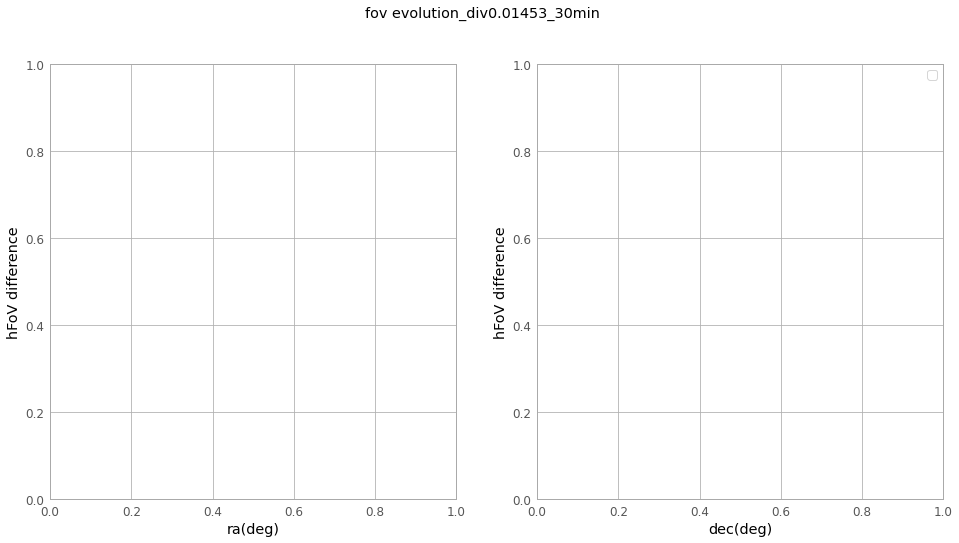

In [28]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[4]}_30min")

for name in stars:
    div=divergence[4]
    for i in range(len(data[name][div]['obstime'])):
    #for j,div in enumerate(divergence):
   
        if data[name][div]['obstime'][i]==Time('2020-02-07T20:30',scale='utc', format='isot'):

            ax[0].scatter(data[name]['ra_dec'][0],data[name][div]['hFoV_track'][i]-data[name][div]['hFoV_track'][0],color='violet')
            ax[1].scatter(data[name]['ra_dec'][1],data[name][div]['hFoV_track'][i]-data[name][div]['hFoV_track'][0],color='violet')

    ax[0].set_ylabel('hFoV difference')
    ax[0].set_xlabel('ra(deg)')
    #ax[0].set_ylim(-1,25)
    
    ax[1].set_ylabel('hFoV difference')
    ax[1].set_xlabel('dec(deg)')
    #ax[1].set_ylim(-1,25)
    #ax[0].legend()
    plt.legend([div])

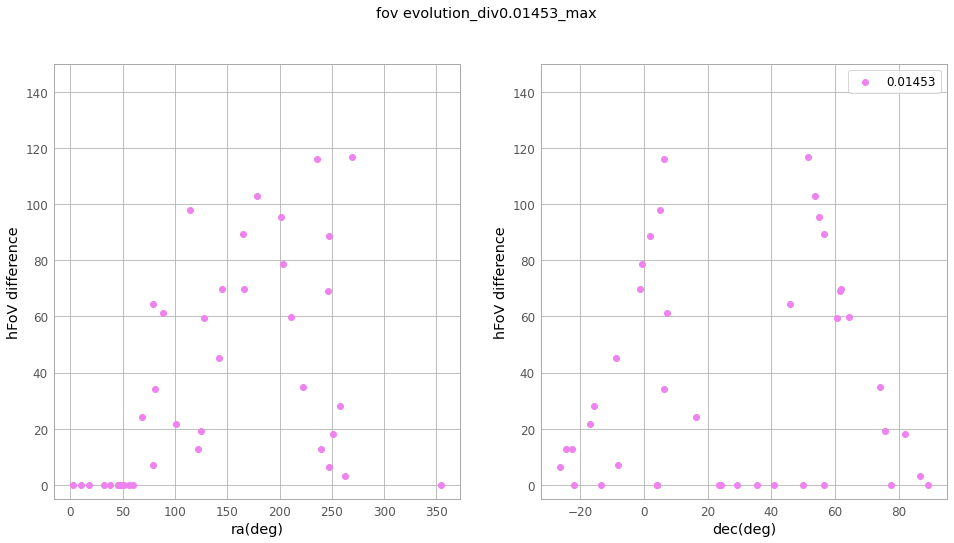

In [29]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[4]}_max")

for name in stars:
    div=divergence[4]
    
    #for j,div in enumerate(divergence):
    ax[0].scatter(data[name]['ra_dec'][0],np.max(data[name][div]['hFoV_track'])-data[name][div]['hFoV_track'][0],color='violet')
    ax[1].scatter(data[name]['ra_dec'][1],np.max(data[name][div]['hFoV_track'])-data[name][div]['hFoV_track'][0],color='violet')

    ax[0].set_ylabel('hFoV difference')
    ax[0].set_xlabel('ra(deg)')
    ax[0].set_ylim(-5,150)
    
    ax[1].set_ylabel('hFoV difference')
    ax[1].set_xlabel('dec(deg)')
    ax[1].set_ylim(-5,150)
    #plt.legend()
    plt.legend([div])

(array([58886.875, 58887.   , 58887.125]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

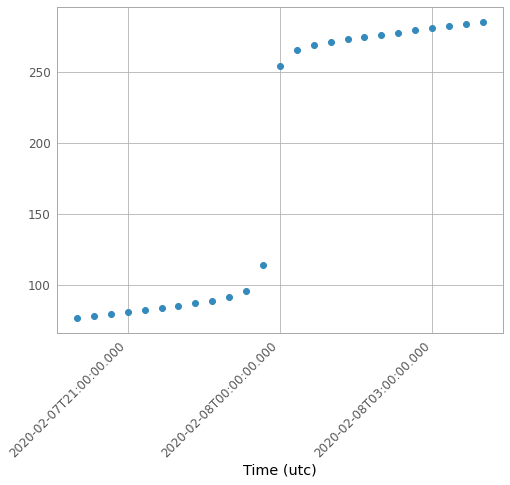

In [30]:
plt.scatter(data[star][divergence[0]]['obstime'],data[star][divergence[0]]['az'])
plt.xticks(rotation=45, ha='right')

Text(0.5, 0, 'dec(deg)')

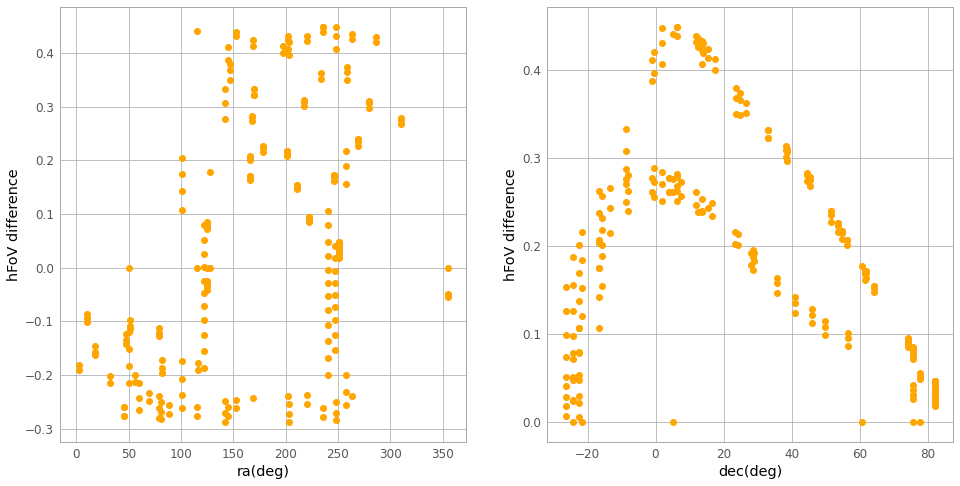

In [31]:
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
for name in stars:
    div=0.0022
    if len(data[name].keys())>1:
        for i in range(len(data[name][div]['alt'])):
            if data[name][div]['alt'][i]<40 and data[name][div]['alt'][i]>30 :
                try:
                    ax[0].scatter(data[name]['ra_dec'][0],data[name][div]['hfov_diff'][i],color=color[2])
                    ax[1].scatter(data[name]['ra_dec'][1],np.abs(data[name][div]['hfov_diff'][i]),color=color[2])
                except ValueError:  #raised if `y` is empty.
                    pass
ax[0].set_ylabel('hFoV difference')
ax[0].set_xlabel('ra(deg)')
#ax[0].set_ylim(-0.05,3.5)

ax[1].set_ylabel('hFoV difference')
ax[1].set_xlabel('dec(deg)')
#ax[1].set_ylim(-1,3.5)
#ax[1].annotate(name, (data[name]['ra_dec'][1],np.max(np.abs(data[name][div]['hfov_diff']))))

#plt.legend([div])